# ML Process Demo (Iris Classification) with Scikit-Learn KNeighborsClassifier

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

## The problem

Classify an Iris flower as 'setosa' or 'versicolor' or 'virginica' (the target classes), based on its 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm) (the features).


## Prepare data

### Data description

We will use the Iris [toy dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html) provided by Scikit Learn: 



We have some data about Iris flowers, collected in the famous Iris flower data set.

The data set consists of 150 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). And 4 features are used to make that classification: the length and the width of the sepals and petals, in centimeters.


### Load the data

In [2]:
iris = datasets.load_iris()

In [3]:
# look at the structure:
print(f'feature_names: {iris.feature_names}')
print(f'data shape: {iris.data.shape}')
print(f'target_names: {iris.target_names}')
print(f'target shape: {iris.target.shape}')

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data shape: (150, 4)
target_names: ['setosa' 'versicolor' 'virginica']
target shape: (150,)


In [4]:
# create a DataFrame from data:
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)

# add the 'target' column at the end
iris_df['target'] = iris.target
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Select features

### Get insite of the data with Seaborn pairplot

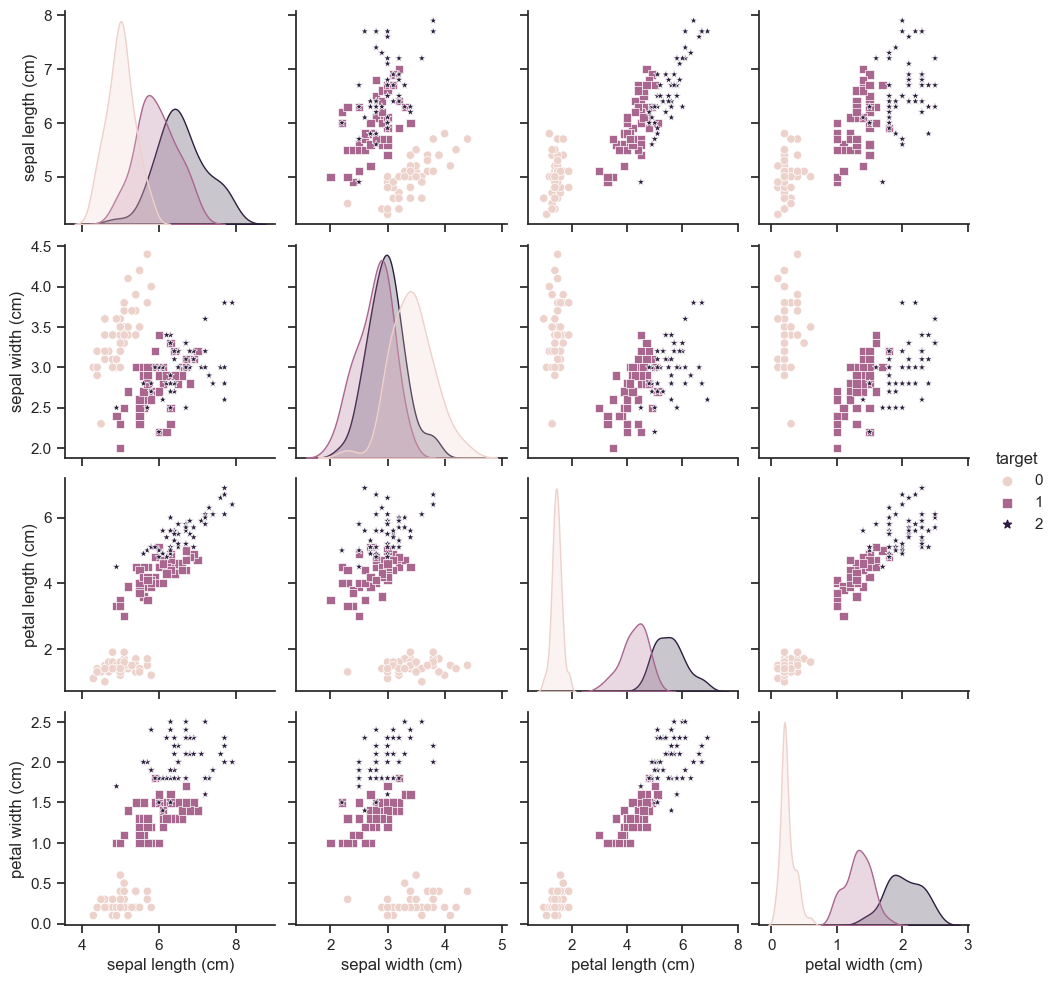

In [5]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(iris_df, 
                 hue = 'target',
                 vars=['sepal length (cm)',
                       'sepal width (cm)',
                       'petal length (cm)',
                       'petal width (cm)',
                      ],                 
                 markers=['o','s','*'])

### Separate the training data from the test data


In [40]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [63]:
# assign the feature (X) matrix and target(y) vector (note, the convention to name matrix with upper letter)

X = iris_df.loc[:,['petal length (cm)','petal width (cm)'] ]
y = iris_df['target']

In [82]:
# if you need the random state not to be preserved during the executions, set random_state=None
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Train the model


In [83]:
# Instantiate the "estimator"
knn = KNeighborsClassifier(n_neighbors=5)

In [84]:
# fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier()

## Test and evaluate the model (classify unknown input sample)


In [85]:
# use our model to predict the classes for our test data:
y_predicted = knn.predict(X_test)

In [86]:
# check the accuracy of our model:
score = knn.score(X_test, y_test)
score

1.0